In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
%matplotlib inline

# Modèle RL with salary_relevant_rows.csv

In [5]:
salary = pd.read_csv('salary_relevant_rows.csv')

In [6]:
salary.shape

(203, 6)

In [7]:
salary.head()

,location,job,comp,salary,anual_salary,city
0,"Houston, TX",Research Financial Analyst II,Baylor College of Medicine,"$65,000 a year",65000.0,Houston
1,"Houston, TX",Sr. Bioinformatics Programmer,Baylor College of Medicine,"$70,000 - $91,000 a year",80500.0,Houston
2,"Tempe, AZ",Data Analysis Specialist,Arizona State University,"$47,476 - $60,000 a year",53738.0,Tempe
3,"Phoenix, AZ 85003 (Central City area)",Research Analyst,"Maricopa County, AZ","$44,616 - $82,618 a year",63617.0,Phoenix
4,"Phoenix, AZ",RESEARCH AND STATISTICAL ANALYST,Arizona Health Care Cost Containment System,"$39,983 - $55,500 a year",47741.5,Phoenix


In [8]:
salary.columns

Index(['location', 'job', 'comp', 'salary', 'anual_salary', 'city'], dtype='object')

In [9]:
salary['location'].value_counts()

New York, NY                                         22
Chicago, IL                                          15
Los Angeles, CA                                      14
Austin, TX                                           13
Seattle, WA                                          13
Philadelphia, PA                                      8
Manhattan, NY                                         8
San Francisco, CA                                     8
Coral Gables, FL                                      8
New York, NY 10167 (Midtown area)                     6
Atlanta, GA                                           6
Phoenix, AZ                                           5
Tempe, AZ                                             4
Dallas, TX                                            3
Rowland Heights, CA 91748                             3
Miami, FL                                             3
Denver, CO                                            3
Houston, TX                                     

In [10]:
salary.location.nunique

<bound method IndexOpsMixin.nunique of 0                                Houston, TX
1                                Houston, TX
2                                  Tempe, AZ
3      Phoenix, AZ 85003 (Central City area)
4                                Phoenix, AZ
5                                Phoenix, AZ
6                                Phoenix, AZ
7                                Phoenix, AZ
8          Phoenix, AZ 85012 (Alhambra area)
9                             Scottsdale, AZ
10                                 Tempe, AZ
11                                 Tempe, AZ
12         Phoenix, AZ 85012 (Alhambra area)
13                               Phoenix, AZ
14                               Chicago, IL
15                               Chicago, IL
16                               Chicago, IL
17                               Chicago, IL
18                               Chicago, IL
19                               Chicago, IL
20                               Chicago, IL
21              

In [11]:
#variables X et Y
X = salary[['location', 'job']]
X.head()

,location,job
0,"Houston, TX",Research Financial Analyst II
1,"Houston, TX",Sr. Bioinformatics Programmer
2,"Tempe, AZ",Data Analysis Specialist
3,"Phoenix, AZ 85003 (Central City area)",Research Analyst
4,"Phoenix, AZ",RESEARCH AND STATISTICAL ANALYST


In [12]:
#variable à predire
y = salary['anual_salary']
y.head()

0    65000.0
1    80500.0
2    53738.0
3    63617.0
4    47741.5
Name: anual_salary, dtype: float64

# pays en int

In [13]:
colonnes = pd.get_dummies(salary['location'])
colonnes.head()

,"Atlanta, GA","Atlanta, GA 30341","Aurora, CO","Aurora, CO 80011 (Norfolk Glen area)","Austin, TX","Azusa, CA","Bellevue, WA","Belmont, CA","Berkeley, CA","Boulder, CO",...,"Richardson, TX","Rowland Heights, CA 91748","San Francisco, CA","San Francisco, CA 94105 (Financial District area)","San Francisco, CA 94124 (Bayview area)","Scottsdale, AZ","Seattle, WA","Smyrna, GA 30082","Spring House, PA","Tempe, AZ"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#fusionner les nouvelles colonnes avec le dataset
new_salary = pd.concat([colonnes, salary], axis=1)
new_salary.head()

,"Atlanta, GA","Atlanta, GA 30341","Aurora, CO","Aurora, CO 80011 (Norfolk Glen area)","Austin, TX","Azusa, CA","Bellevue, WA","Belmont, CA","Berkeley, CA","Boulder, CO",...,"Seattle, WA","Smyrna, GA 30082","Spring House, PA","Tempe, AZ",location,job,comp,salary,anual_salary,city
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,"Houston, TX",Research Financial Analyst II,Baylor College of Medicine,"$65,000 a year",65000.0,Houston
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,"Houston, TX",Sr. Bioinformatics Programmer,Baylor College of Medicine,"$70,000 - $91,000 a year",80500.0,Houston
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,"Tempe, AZ",Data Analysis Specialist,Arizona State University,"$47,476 - $60,000 a year",53738.0,Tempe
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,"Phoenix, AZ 85003 (Central City area)",Research Analyst,"Maricopa County, AZ","$44,616 - $82,618 a year",63617.0,Phoenix
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,"Phoenix, AZ",RESEARCH AND STATISTICAL ANALYST,Arizona Health Care Cost Containment System,"$39,983 - $55,500 a year",47741.5,Phoenix


In [15]:
new_salary.columns

Index(['Atlanta, GA', 'Atlanta, GA 30341', 'Aurora, CO',
       'Aurora, CO 80011 (Norfolk Glen area)', 'Austin, TX', 'Azusa, CA',
       'Bellevue, WA', 'Belmont, CA', 'Berkeley, CA', 'Boulder, CO',
       'Burbank, CA', 'Charlotte, NC 28203 (Dilworth area)',
       'Chatsworth, CA 91311', 'Chicago, IL', 'Chicago, IL 60601 (Loop area)',
       'Chicago, IL 60603 (Loop area)', 'Coral Gables, FL',
       'Culver City, CA 90230', 'Dallas, TX', 'Dallas-Fort Worth, TX',
       'Denver, CO', 'Denver, CO 80204 (Central West Denver area)',
       'Des Plaines, IL', 'Dublin, OH 43017', 'Evanston, IL',
       'Fort Washington, PA', 'Fullerton, CA', 'Houston, TX', 'Irving, TX',
       'Irving, TX 75038', 'Irving, TX 75063', 'King of Prussia, PA',
       'Long Beach, CA', 'Los Angeles, CA', 'Los Angeles, CA 90021',
       'Los Angeles, CA 90032', 'Los Angeles, CA 90046', 'Manhattan, NY',
       'Miami Lakes, FL', 'Miami, FL', 'Monroe, NC', 'New York, NY',
       'New York, NY 10001 (Chelsea area)

In [16]:
#je drop the state column
new = new_salary.drop(new_salary.columns[[67]], axis=1)
new.head()

,"Atlanta, GA","Atlanta, GA 30341","Aurora, CO","Aurora, CO 80011 (Norfolk Glen area)","Austin, TX","Azusa, CA","Bellevue, WA","Belmont, CA","Berkeley, CA","Boulder, CO",...,"Scottsdale, AZ","Seattle, WA","Smyrna, GA 30082","Spring House, PA","Tempe, AZ",job,comp,salary,anual_salary,city
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Research Financial Analyst II,Baylor College of Medicine,"$65,000 a year",65000.0,Houston
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Sr. Bioinformatics Programmer,Baylor College of Medicine,"$70,000 - $91,000 a year",80500.0,Houston
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,Data Analysis Specialist,Arizona State University,"$47,476 - $60,000 a year",53738.0,Tempe
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Research Analyst,"Maricopa County, AZ","$44,616 - $82,618 a year",63617.0,Phoenix
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,RESEARCH AND STATISTICAL ANALYST,Arizona Health Care Cost Containment System,"$39,983 - $55,500 a year",47741.5,Phoenix


In [17]:
#is NaN
nombre_nan = new.isna().sum()
nombre_nan

Atlanta, GA                                          0
Atlanta, GA 30341                                    0
Aurora, CO                                           0
Aurora, CO 80011 (Norfolk Glen area)                 0
Austin, TX                                           0
Azusa, CA                                            0
Bellevue, WA                                         0
Belmont, CA                                          0
Berkeley, CA                                         0
Boulder, CO                                          0
Burbank, CA                                          0
Charlotte, NC 28203 (Dilworth area)                  0
Chatsworth, CA 91311                                 0
Chicago, IL                                          0
Chicago, IL 60601 (Loop area)                        0
Chicago, IL 60603 (Loop area)                        0
Coral Gables, FL                                     0
Culver City, CA 90230                                0
Dallas, TX

In [18]:
#drop rows with NaN by product_name
sans_NaN = new.dropna(subset=['anual_salary'])
sans_NaN.head()

,"Atlanta, GA","Atlanta, GA 30341","Aurora, CO","Aurora, CO 80011 (Norfolk Glen area)","Austin, TX","Azusa, CA","Bellevue, WA","Belmont, CA","Berkeley, CA","Boulder, CO",...,"Scottsdale, AZ","Seattle, WA","Smyrna, GA 30082","Spring House, PA","Tempe, AZ",job,comp,salary,anual_salary,city
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Research Financial Analyst II,Baylor College of Medicine,"$65,000 a year",65000.0,Houston
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Sr. Bioinformatics Programmer,Baylor College of Medicine,"$70,000 - $91,000 a year",80500.0,Houston
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,Data Analysis Specialist,Arizona State University,"$47,476 - $60,000 a year",53738.0,Tempe
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Research Analyst,"Maricopa County, AZ","$44,616 - $82,618 a year",63617.0,Phoenix
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,RESEARCH AND STATISTICAL ANALYST,Arizona Health Care Cost Containment System,"$39,983 - $55,500 a year",47741.5,Phoenix


In [19]:
#is NaN
nombre_nan = sans_NaN.isna().sum()
nombre_nan

Atlanta, GA                                          0
Atlanta, GA 30341                                    0
Aurora, CO                                           0
Aurora, CO 80011 (Norfolk Glen area)                 0
Austin, TX                                           0
Azusa, CA                                            0
Bellevue, WA                                         0
Belmont, CA                                          0
Berkeley, CA                                         0
Boulder, CO                                          0
Burbank, CA                                          0
Charlotte, NC 28203 (Dilworth area)                  0
Chatsworth, CA 91311                                 0
Chicago, IL                                          0
Chicago, IL 60601 (Loop area)                        0
Chicago, IL 60603 (Loop area)                        0
Coral Gables, FL                                     0
Culver City, CA 90230                                0
Dallas, TX

In [20]:
#redéfinir X
X = sans_NaN.iloc[:,0:67].values
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [21]:
#variable à predire
y = sans_NaN['anual_salary']

In [24]:
y_array = y.values
y_array

array([ 65000. ,  80500. ,  53738. ,  63617. ,  47741.5,  68500. ,
        56677. ,  55735. ,  48991.5,  52500. ,  49738. ,  60000. ,
       150000. ,  56871. , 110000. ,  28800. , 110000. , 132500. ,
        80000. , 180000. , 180000. , 155000. , 128016. ,  90000. ,
        82500. , 110000. ,  38400. ,  67500. , 172800. , 140000. ,
        70000. , 200000. , 115000. , 135000. ,  34142. , 140000. ,
       111774. , 160000. , 180000. , 165000. , 140000. , 140000. ,
        34142. , 115200. , 160000. ,  62850. , 250000. ,  79249.5,
        65977. , 125000. ,  33650. , 200000. , 120000. , 165000. ,
        74119.5,  79249.5,  79249.5,  78510.5,  84315. ,  77975. ,
        46072. ,  57500. ,  64055.5,  76941.5,  98806. ,  87500. ,
       110000. ,  88331. ,  79025.5,  90981. , 212500. ,  79249.5,
        60000. ,  79249.5,  76941.5,  76941.5, 124500. ,  56576. ,
        80000. ,  76941.5,  95000. , 107500. , 180000. , 145000. ,
       175000. ,  97500. ,  90000. , 180000. ,  67200. ,  8500

In [20]:
#2. Diviser le dataset entre training et test set
X_train, X_test, y_train, y_test = train_test_split(X, y_array, test_size=0.25, random_state=0)

In [21]:
#convert en int
y_train2 = y_train.astype(np.int)

In [22]:
#4. Construire le modèle avec -> from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression

modele = LogisticRegression(solver='lbfgs')
modele.fit(X_train, y_train2)

C:\Users\utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
y_predict = modele.predict(X_test)
y_predict

array([140000, 140000, 140000, 140000,  71400, 140000, 140000, 180000,
       180000, 110000, 140000, 140000, 140000, 140000,  71400, 140000,
       180000, 180000, 140000, 140000, 180000,  71400, 140000, 140000,
       140000, 180000, 140000, 140000,  71400, 140000, 110000, 140000,
       180000, 140000, 140000, 140000,  71400, 140000, 140000,  90000,
       140000, 140000, 180000, 140000, 180000,  50000, 180000, 140000,
       180000])

In [24]:
y_test.dtype

dtype('float64')

In [25]:
y_test.astype(np.int)

array([145000, 150000, 135000,  73860, 102498,  55000,  51138,  56072,
        76941,  80000,  55735,  68500, 130000,  57500,  80004,  28800,
        75864,  46072, 160000,  93100,  79249,  71400,  40014,  85000,
        76941,  79249,  66654,  63012,  69996,  62850, 128016,  62500,
       110000, 160000,  47741,  95000, 150000, 100000, 125000,  38400,
        50375,  56000,  79249,  48991,  57500,  60000,  56072,  60000,
        97476])

In [26]:
y_predict.dtype

dtype('int32')

In [27]:
y_predict

array([140000, 140000, 140000, 140000,  71400, 140000, 140000, 180000,
       180000, 110000, 140000, 140000, 140000, 140000,  71400, 140000,
       180000, 180000, 140000, 140000, 180000,  71400, 140000, 140000,
       140000, 180000, 140000, 140000,  71400, 140000, 110000, 140000,
       180000, 140000, 140000, 140000,  71400, 140000, 140000,  90000,
       140000, 140000, 180000, 140000, 180000,  50000, 180000, 140000,
       180000])

In [28]:
np.unique(y_train)

array([ 24960. ,  28800. ,  32900. ,  33650. ,  34142. ,  38244. ,
        39192. ,  40014. ,  42090. ,  45000. ,  46000. ,  48000. ,
        48738. ,  49738. ,  50000. ,  50500. ,  51409. ,  51706. ,
        52500. ,  53738. ,  55008. ,  55548. ,  56000. ,  56576. ,
        56677. ,  56871. ,  57500. ,  57600. ,  60000. ,  63012. ,
        63617. ,  64055.5,  64213. ,  64638. ,  65000. ,  65568. ,
        65977. ,  66700. ,  66996. ,  67026. ,  67200. ,  67500. ,
        68000. ,  68436. ,  69900. ,  70000. ,  71400. ,  73200. ,
        73860. ,  74119.5,  75366. ,  75400. ,  76941.5,  77975. ,
        78510.5,  79025.5,  79249.5,  79758.5,  80000. ,  80500. ,
        82500. ,  84315. ,  84495.5,  85000. ,  85399. ,  86400. ,
        87500. ,  88331. ,  90000. ,  90981. ,  94531. ,  95000. ,
        97476. ,  97500. ,  98806. , 100000. , 102498. , 102500. ,
       102636. , 104708.5, 105000. , 107500. , 108600. , 110000. ,
       111774. , 112500. , 115000. , 115200. , 120000. , 12450

In [29]:
np.unique(y_test)

array([ 28800. ,  38400. ,  40014. ,  46072. ,  47741.5,  48991.5,
        50375. ,  51138. ,  55000. ,  55735. ,  56000. ,  56072. ,
        57500. ,  60000. ,  62500. ,  62850. ,  63012. ,  66654. ,
        68500. ,  69996. ,  71400. ,  73860. ,  75864. ,  76941.5,
        79249.5,  80000. ,  80004. ,  85000. ,  93100. ,  95000. ,
        97476. , 100000. , 102498. , 110000. , 125000. , 128016. ,
       130000. , 135000. , 145000. , 150000. , 160000. ])

In [30]:
#accuracy
metrics.accuracy_score(y_test.astype(np.int), y_predict)

0.02040816326530612

In [31]:
from sklearn import metrics
metrics.confusion_matrix(y_test.astype(np.int), y_predict)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

(array([13., 40., 40., 35., 23., 12.,  9.,  9.,  8.,  2.,  1.,  1.,  2.,
         0.,  1.]),
 array([ 24960.,  42496.,  60032.,  77568.,  95104., 112640., 130176.,
        147712., 165248., 182784., 200320., 217856., 235392., 252928.,
        270464., 288000.]),
 <a list of 15 Patch objects>)

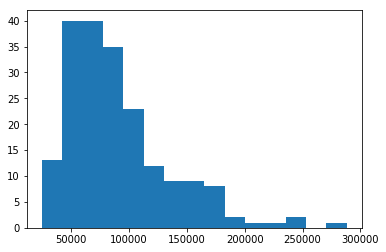

In [32]:
plt.hist(y_array,15)

In [33]:
#Création de niveau de salaires entre 0 et 8

y_class0 = np.where(y_array > 180000, 0, y_array)
y_class1 = np.where(y_class0 > 150000, 1, y_class0)
y_class2 = np.where(y_class1 > 120000, 2, y_class1)
y_class3 = np.where(y_class2 > 100000, 3, y_class2)
y_class4 = np.where(y_class3 > 85000, 4, y_class3)
y_class5 = np.where(y_class4 > 70000, 5, y_class4)
y_class6 = np.where(y_class5 > 60000, 6, y_class5)
y_class7 = np.where(y_class6 > 50000, 7, y_class6)
y_class8 = np.where(y_class7 > 10, 8, y_class7)

(array([ 7.,  0.,  7., 10., 32., 32., 29., 18., 13., 12., 10.,  8.,  6.,
         4.,  8.]),
 array([     0.,  12000.,  24000.,  36000.,  48000.,  60000.,  72000.,
         84000.,  96000., 108000., 120000., 132000., 144000., 156000.,
        168000., 180000.]),
 <a list of 15 Patch objects>)

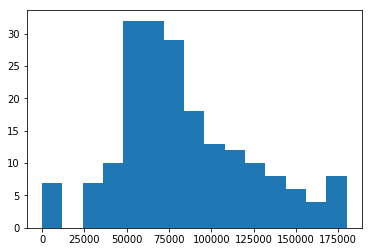

In [34]:
plt.hist(y_class0,15)

(array([22.,  0.,  3.,  7., 11., 28., 27., 26., 18., 12., 10., 11.,  8.,
         4.,  9.]),
 array([     0.,  10000.,  20000.,  30000.,  40000.,  50000.,  60000.,
         70000.,  80000.,  90000., 100000., 110000., 120000., 130000.,
        140000., 150000.]),
 <a list of 15 Patch objects>)

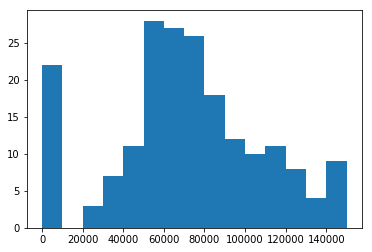

In [35]:
plt.hist(y_class1,15)

(array([41.,  0.,  0.,  3.,  7.,  7., 20., 21., 23., 21., 17.,  9., 10.,
        12.,  5.]),
 array([     0.,   8000.,  16000.,  24000.,  32000.,  40000.,  48000.,
         56000.,  64000.,  72000.,  80000.,  88000.,  96000., 104000.,
        112000., 120000.]),
 <a list of 15 Patch objects>)

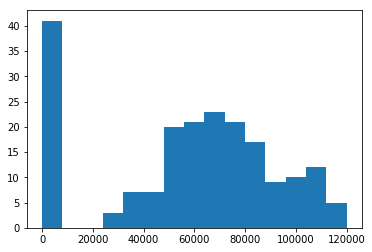

In [36]:
plt.hist(y_class2,15)

(array([62.,  0.,  0.,  1.,  3.,  6.,  6., 16., 17., 17., 16., 20., 16.,
         7.,  9.]),
 array([     0.        ,   6666.66666667,  13333.33333333,  20000.        ,
         26666.66666667,  33333.33333333,  40000.        ,  46666.66666667,
         53333.33333333,  60000.        ,  66666.66666667,  73333.33333333,
         80000.        ,  86666.66666667,  93333.33333333, 100000.        ]),
 <a list of 15 Patch objects>)

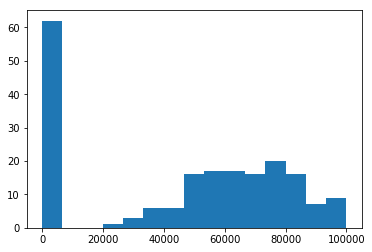

In [37]:
plt.hist(y_class3,15)

(array([80.,  0.,  0.,  0.,  1.,  4.,  5.,  4., 14., 15., 10., 18., 11.,
        19., 15.]),
 array([    0.        ,  5666.66666667, 11333.33333333, 17000.        ,
        22666.66666667, 28333.33333333, 34000.        , 39666.66666667,
        45333.33333333, 51000.        , 56666.66666667, 62333.33333333,
        68000.        , 73666.66666667, 79333.33333333, 85000.        ]),
 <a list of 15 Patch objects>)

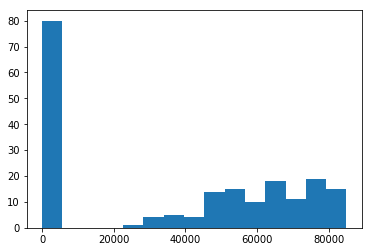

In [38]:
plt.hist(y_class4,15)

(array([118.,   0.,   0.,   0.,   0.,   1.,   2.,   4.,   5.,   4.,  13.,
          8.,  16.,  10.,  15.]),
 array([    0.        ,  4666.66666667,  9333.33333333, 14000.        ,
        18666.66666667, 23333.33333333, 28000.        , 32666.66666667,
        37333.33333333, 42000.        , 46666.66666667, 51333.33333333,
        56000.        , 60666.66666667, 65333.33333333, 70000.        ]),
 <a list of 15 Patch objects>)

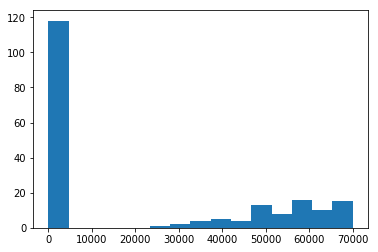

In [39]:
plt.hist(y_class5,15)

(array([143.,   0.,   0.,   0.,   0.,   0.,   1.,   2.,   4.,   3.,   3.,
          4.,  14.,   6.,  16.]),
 array([    0.,  4000.,  8000., 12000., 16000., 20000., 24000., 28000.,
        32000., 36000., 40000., 44000., 48000., 52000., 56000., 60000.]),
 <a list of 15 Patch objects>)

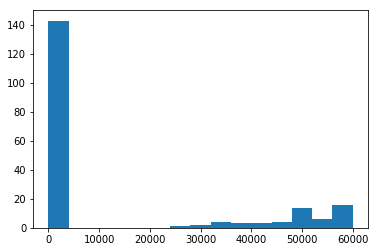

In [40]:
plt.hist(y_class6,15)

(array([170.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   2.,   1.,   3.,
          3.,   3.,   3.,  10.]),
 array([    0.        ,  3333.33333333,  6666.66666667, 10000.        ,
        13333.33333333, 16666.66666667, 20000.        , 23333.33333333,
        26666.66666667, 30000.        , 33333.33333333, 36666.66666667,
        40000.        , 43333.33333333, 46666.66666667, 50000.        ]),
 <a list of 15 Patch objects>)

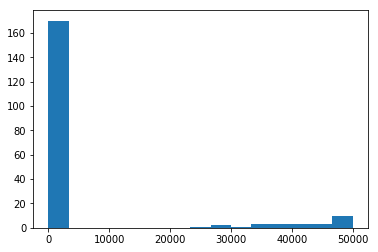

In [41]:
plt.hist(y_class7,15)

(array([ 7., 15.,  0., 19.,  0., 21.,  0., 18.,  0., 38.,  0., 25.,  0.,
        27., 26.]),
 array([0.        , 0.53333333, 1.06666667, 1.6       , 2.13333333,
        2.66666667, 3.2       , 3.73333333, 4.26666667, 4.8       ,
        5.33333333, 5.86666667, 6.4       , 6.93333333, 7.46666667,
        8.        ]),
 <a list of 15 Patch objects>)

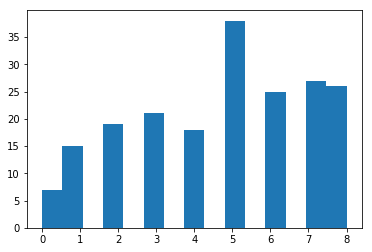

In [42]:
plt.hist(y_class8,15)

In [43]:
np.unique(y_class8)

array([0., 1., 2., 3., 4., 5., 6., 7., 8.])

In [25]:
y_array.reshape(-1, 1)

array([[ 65000. ],
       [ 80500. ],
       [ 53738. ],
       [ 63617. ],
       [ 47741.5],
       [ 68500. ],
       [ 56677. ],
       [ 55735. ],
       [ 48991.5],
       [ 52500. ],
       [ 49738. ],
       [ 60000. ],
       [150000. ],
       [ 56871. ],
       [110000. ],
       [ 28800. ],
       [110000. ],
       [132500. ],
       [ 80000. ],
       [180000. ],
       [180000. ],
       [155000. ],
       [128016. ],
       [ 90000. ],
       [ 82500. ],
       [110000. ],
       [ 38400. ],
       [ 67500. ],
       [172800. ],
       [140000. ],
       [ 70000. ],
       [200000. ],
       [115000. ],
       [135000. ],
       [ 34142. ],
       [140000. ],
       [111774. ],
       [160000. ],
       [180000. ],
       [165000. ],
       [140000. ],
       [140000. ],
       [ 34142. ],
       [115200. ],
       [160000. ],
       [ 62850. ],
       [250000. ],
       [ 79249.5],
       [ 65977. ],
       [125000. ],
       [ 33650. ],
       [200000. ],
       [1200

In [45]:
y_array

array([ 65000. ,  80500. ,  53738. ,  63617. ,  47741.5,  68500. ,
        56677. ,  55735. ,  48991.5,  52500. ,  49738. ,  60000. ,
       150000. ,  56871. , 110000. ,  28800. , 110000. , 132500. ,
        80000. , 180000. , 180000. , 155000. , 128016. ,  90000. ,
        82500. , 110000. ,  38400. ,  67500. , 172800. , 140000. ,
        70000. , 200000. , 115000. , 135000. ,  34142. , 140000. ,
       111774. , 160000. , 180000. , 165000. , 140000. , 140000. ,
        34142. , 115200. , 160000. ,  62850. , 250000. ,  79249.5,
        65977. , 125000. ,  33650. , 200000. , 120000. , 165000. ,
        74119.5,  79249.5,  79249.5,  78510.5,  84315. ,  77975. ,
        46072. ,  57500. ,  64055.5,  76941.5,  98806. ,  87500. ,
       110000. ,  88331. ,  79025.5,  90981. , 212500. ,  79249.5,
        60000. ,  79249.5,  76941.5,  76941.5, 124500. ,  56576. ,
        80000. ,  76941.5,  95000. , 107500. , 180000. , 145000. ,
       175000. ,  97500. ,  90000. , 180000. ,  67200. ,  8500

In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(y_array.reshape(-1, 1))
y_k = kmeans.labels_ #.astype(np.int)
y_k

array([2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 2, 2, 1, 1, 2, 3, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0,
       1, 2, 3, 0, 2, 1, 2, 3, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       2, 0, 2, 0, 0, 0, 2, 1, 3, 0, 1, 0, 1, 2, 2, 0, 0, 3, 0, 2, 2, 2,
       2, 2, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 2, 0, 2, 1, 0, 0, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 2, 2, 3, 1, 0, 0, 2, 2, 0, 2,
       2, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 1, 0, 2, 2, 2],
      dtype=int32)

In [47]:
y_class = y_class8.astype(np.int)
y_class

array([6, 5, 7, 6, 8, 6, 7, 7, 8, 7, 8, 7, 2, 7, 3, 8, 3, 2, 5, 1, 1, 1,
       2, 4, 5, 3, 8, 6, 1, 2, 6, 0, 3, 2, 8, 2, 3, 1, 1, 1, 2, 2, 8, 3,
       1, 6, 0, 5, 6, 2, 8, 0, 3, 1, 5, 5, 5, 5, 5, 5, 8, 7, 6, 5, 4, 4,
       3, 4, 5, 4, 0, 5, 7, 5, 5, 5, 2, 7, 5, 5, 4, 3, 1, 2, 1, 4, 4, 1,
       6, 5, 8, 4, 3, 4, 6, 2, 0, 3, 2, 3, 1, 7, 7, 3, 4, 0, 4, 6, 6, 7,
       6, 8, 3, 5, 6, 4, 3, 5, 4, 3, 2, 5, 7, 5, 7, 2, 5, 5, 1, 2, 7, 8,
       7, 8, 7, 8, 8, 7, 8, 7, 3, 4, 8, 7, 5, 5, 5, 8, 7, 4, 6, 4, 6, 5,
       6, 6, 7, 8, 8, 8, 2, 7, 5, 7, 6, 5, 6, 6, 0, 2, 5, 3, 6, 5, 3, 6,
       5, 5, 2, 5, 7, 8, 6, 8, 8, 3, 8, 5, 8, 3, 4, 1, 5, 7, 6, 7])

In [48]:
#2. Diviser le dataset entre training et test set
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.25, random_state=0)

In [49]:
#4. Construire le modèle avec -> from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression

modele = LogisticRegression(solver='lbfgs')
modele.fit(X_train, y_train)

C:\Users\utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [50]:
y_predict = modele.predict(X_test)
y_predict

array([3, 7, 1, 5, 5, 5, 8, 5, 5, 3, 7, 7, 5, 8, 5, 5, 5, 5, 1, 8, 5, 5,
       8, 5, 5, 5, 5, 8, 5, 5, 3, 5, 5, 1, 7, 3, 5, 4, 8, 4, 8, 8, 5, 7,
       5, 8, 5, 5, 5])

In [51]:
#accuracy
metrics.accuracy_score(y_test, y_predict)

0.30612244897959184

In [52]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_predict)

array([[ 2,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  2,  0,  2,  0,  1,  1],
       [ 0,  0,  0,  0,  2,  0,  0,  0],
       [ 0,  0,  1,  1,  1,  0,  0,  1],
       [ 0,  0,  1,  0, 10,  0,  0,  0],
       [ 0,  0,  0,  0,  4,  0,  1,  1],
       [ 0,  0,  0,  0,  5,  0,  1,  5],
       [ 0,  0,  0,  1,  2,  0,  2,  1]], dtype=int64)

In [53]:
#Essai en supprimant un colonne de X pour éviter la multi-colinéarité des données: il semblerait qu'on obtienne le même résultat.
X_bis = X[:,:66]
print(X_bis.shape)
print(X.shape)

(196, 66)
(196, 67)


In [54]:
#2. Diviser le dataset entre training et test set
X_train, X_test, y_train, y_test = train_test_split(X_bis, y_class, test_size=0.25, random_state=0)
#4. Construire le modèle avec -> from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression

modele = LogisticRegression(solver='lbfgs')
modele.fit(X_train, y_train)
y_predict = modele.predict(X_test)
#accuracy
metrics.accuracy_score(y_test, y_predict)

C:\Users\utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.30612244897959184

In [55]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_predict)

array([[ 2,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  2,  0,  2,  0,  1,  1],
       [ 0,  0,  0,  0,  2,  0,  0,  0],
       [ 0,  0,  1,  1,  1,  0,  0,  1],
       [ 0,  0,  1,  0, 10,  0,  0,  0],
       [ 0,  0,  0,  0,  4,  0,  1,  1],
       [ 0,  0,  0,  0,  5,  0,  1,  5],
       [ 0,  0,  0,  1,  2,  0,  2,  1]], dtype=int64)

### Essai avec les clusters k-means:

In [56]:
#2. Diviser le dataset entre training et test set
X_train, X_test, y_train, y_test = train_test_split(X_bis, y_k, test_size=0.25, random_state=2)
#K-means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(y_train.reshape(-1, 1))
y_train_k = kmeans.labels_.astype(np.int)
y_test_k = kmeans.predict(y_test.reshape(-1, 1)).astype(np.int)
#4. Construire le modèle avec -> from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression

modele = LogisticRegression(solver='lbfgs')
modele.fit(X_train, y_train_k)
y_predict = modele.predict(X_test)
#accuracy
metrics.accuracy_score(y_test_k, y_predict)

C:\Users\utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.6122448979591837

In [57]:
y_train

array([2, 2, 0, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 1, 2, 2, 2, 0, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 0, 2, 0, 2, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2,
       0, 0, 1, 2, 1, 0, 0, 2, 1, 2, 2, 0, 2, 0, 1, 0, 1, 0, 3, 2, 2, 1,
       1, 0, 2, 0, 1, 3, 1, 2, 3, 0, 0, 0, 0, 2, 2, 1, 1, 2, 2, 2, 1, 0,
       2, 0, 0, 3, 2, 0, 0, 2, 0, 1, 1, 0, 3, 2, 0, 2, 2, 2, 1, 0, 2, 2,
       3, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 2, 2, 3])

# elbow method

C:\Users\utilisateur\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\utilisateur\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\utilisateur\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\utilisateur\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\utilisateur\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971

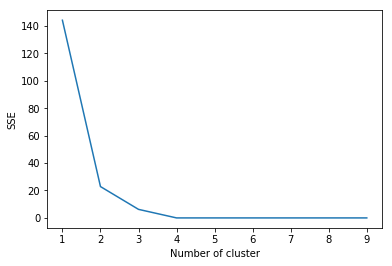

In [58]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k,init = 'k-means++', max_iter=1000).fit(y_train.reshape(-1, 1))
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [59]:
from sklearn import metrics
metrics.confusion_matrix(y_test_k, y_predict)

array([[ 8,  4,  0],
       [ 4, 20,  0],
       [ 6,  5,  2]], dtype=int64)

In [60]:
#2. Diviser le dataset entre training et test set
X_train, X_test, y_train, y_test = train_test_split(X_bis, y_k, test_size=0.25, random_state=0)
#K-means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(y_train.reshape(-1, 1))
y_train_k = kmeans.labels_.astype(np.int)
y_test_k = kmeans.predict(y_test.reshape(-1, 1)).astype(np.int)
y_test_k

array([2, 2, 2, 0, 0, 1, 1, 1, 0, 0, 1, 1, 2, 1, 0, 1, 0, 1, 2, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 2, 1, 0, 2, 1, 0, 2, 0, 2, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0])

C:\Users\utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\utilisateur\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\utilisateur\Anaconda

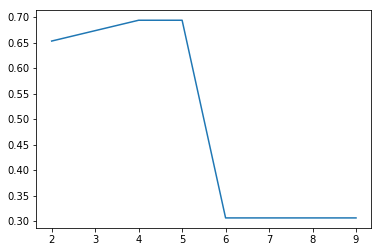

In [72]:
#2. Diviser le dataset entre training et test set
X_train, X_test, y_train, y_test = train_test_split(X_bis, y_k, test_size=0.25, random_state=0)
#K-means
cluster_number = list(range(2,10))
accuracy = []
for i in range(2,10):
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter=1000, random_state=0).fit(y_train.reshape(-1, 1))
    y_train_k = kmeans.labels_.astype(np.int)
    y_test_k = kmeans.predict(y_test.reshape(-1, 1)).astype(np.int)
    #4. Construire le modèle avec -> from sklearn.linear_model import LogisticRegression
    from sklearn.linear_model import LogisticRegression
    
    modele = LogisticRegression(solver='lbfgs')
    modele.fit(X_train, y_train_k)
    y_predict = modele.predict(X_test)
    #accuracy
    accuracy.append(metrics.accuracy_score(y_test_k, y_predict))
    
plt.plot(cluster_number,accuracy)

# modèle Kernel_RBF

In [67]:
#Construire le modèle SVM (SVC) avec kernel = rbf et gamma = scale

from sklearn.svm import SVC
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, init = 'k-means++', max_iter=1000, random_state=0).fit(y_train.reshape(-1, 1))
y_train_k = kmeans.labels_.astype(np.int)
y_test_k = kmeans.predict(y_test.reshape(-1, 1)).astype(np.int)
modele = SVC(kernel='rbf',gamma = 'scale')
#fit = train the model
modele.fit(X_train, y_train_k)

C:\Users\utilisateur\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [68]:
# Effectuer de nouvelles prédictions

y_predicte = modele.predict(X_test)

In [69]:
y_predicte

array([2, 1, 2, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 2, 1, 2, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0])

In [70]:
#matrice de confusion

from sklearn import metrics
metrics.confusion_matrix(y_test_k, y_predicte)

array([[11,  4,  1],
       [ 5, 19,  0],
       [ 1,  4,  4]], dtype=int64)

In [71]:
metrics.accuracy_score(y_test_k, y_predicte)

0.6938775510204082